## Question #1 (50 points)

***This question consists of plotting and a conceptual question. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for anharmonically coupled oscillators, create a figure that superimposes

* a contour plot of the potential energy, and;
* the trajectory of $Q_1$ and $Q_2$.

### Point breakdown

* Contour plot (20 points)
* Trajectory plot (20 points)
* Physical explanation (10 points)

### The potential energy

$$ \Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2 $$

### Constrained parameters and initial conditions

Take $K_1 = 1$, $K_2 = 0.2$, $M_1 = M_2 = 1$, and $C=0.5$. For the initial conditions, take $Q_1(0) = 0$, $Q_2(0) = 1$, and both velocities starting at zero.

### Plotting constraints
Plot $Q_1$ and $Q_2$ on the horizontal and vertical axes, respectively. I suggest a meshgrid of at least $100 \times 100$ points.

For your contour plot, combine `plt.contour` and `plt.contourf` with code similar to the following:

* `plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')`
* `plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)`

Also, use `plt.xlim(-1.5, 1.5)` and `plt.ylim(-1.5, 1.5)`

Don't forget to label your axes.

### Getting and plotting the trajectory

To get the trajectory, you will need to set up and solve the equations of motion, as we did in previous homework and in class. Then you can plot $Q_2$ versus $Q_1$ with `matplotlib` using a line of code similar to `plt.plot(Q1, Q2, color='red', label="Trajectory")`.

Plot the trajectory from $t=0$ to $t=50$, with an appropriate choice of mesh points to ensure the trajectory is resolved. (e.g. `t_mesh = np.linspace(0, 50, 200)`)

### Physical explanation

With your code complete, you can test four cases for the initial conditions (all with the initial velocity set to zero):

1. $Q_1(0) = 0$, $Q_2(0) = 1$ (**submit this plot**)
2. $Q_1(0) = 0$, $Q_2(0) = -1$
3. $Q_1(0) = 1$, $Q_2(0) = 0$
4. $Q_1(0) = -1$, $Q_2(0) = 0$

Why do the dynamics differ when only $Q_1$ is initially displaced compared to when only $Q_2$ is initially displaced? How does this relate to the coupling term in the potential energy? What is the physical interpretation? You could use our cylindrical beam example from class to describe this, if you like.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

In [18]:
K1 = 1
K2 = 0.2
C = 0.5

def interactive_contour(K1=1.0, K2=1.0, C=0.5):
    Q1 = np.linspace(-1.5, 1.5, 100)
    Q2 = np.linspace(-1.5, 1.5, 100)
    Q1_grid, Q2_grid = np.meshgrid(Q1, Q2)
    
    U_grid = 0.5 * K1 * Q1_grid**2 + 0.5 * K2 * Q2_grid**2 + (1/3) * C * Q1_grid * Q2_grid**2


    plt.figure(figsize=(8, 6))
    plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')
    plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)


    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.xlabel('Q1')
    plt.ylabel('Q2')
    plt.title('Contour Plot of Potential Energy Surface')
    plt.colorbar(label='U (Potential Energy)')

    plt.show()


interact(
    interactive_contour,
     K1=FloatSlider(value=1.0, min=-2.0, max=2.0, step=0.1, description="K1"),
    K2=FloatSlider(value=1.0, min=-2.0, max=2.0, step=0.1, description="K2"),
    C=FloatSlider(value=1.0, min=-1.0, max=2.0, step=0.1, description="C")
)
     


interactive(children=(FloatSlider(value=1.0, description='K1', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

<function __main__.interactive_contour(K1=1.0, K2=1.0, C=0.5)>

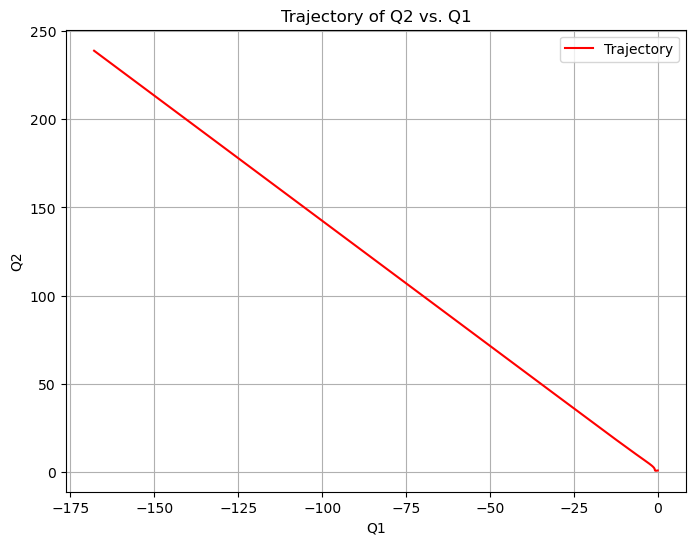

In [27]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def equations_of_motion_2D(t, y, K1, K2, C, M1, M2):
    Q1, Q2, P1, P2 = y  
    dQ1_dt = P1 / M1
    dQ2_dt = P2 / M2
    dP1_dt = -K1 * Q1 - C * Q2**2
    dP2_dt = -K2 * Q2 - 2 * C * Q1 * Q2
    return [dQ1_dt, dQ2_dt, dP1_dt, dP2_dt]


K1, K2, C, M1, M2 = 1, 0.2, 0.5, 1, 1  # Constants


Q1_0 = 0
Q2_0 = 1  # Case 1: Q2 starts at 1
P1_0 = 0
P2_0 = 0


t_max = 50
num_points = 200
t_mesh = np.linspace(0, t_max, num_points)


sol = solve_ivp(
    equations_of_motion_2D,
    (0, t_max),
    [Q1_0, Q2_0, P1_0, P2_0],  # Initial state: [Q1, Q2, P1, P2]
    t_eval=t_mesh,
    args=(K1, K2, C, M1, M2),
    method='RK45'
)


Q1 = sol.y[0]
Q2 = sol.y[1]


plt.figure(figsize=(8, 6))
plt.plot(Q1, Q2, color='red', label="Trajectory")
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.title('Trajectory of Q2 vs. Q1')
plt.legend()
plt.grid()
plt.show()


### Pysical interpretation ###

The dynamics differ between Q1 and Q2, because Q1 is less dominate than Q2 since eventually Q2 will dominate and make Q1 negligiable. In the coupling term it shows that Q1 is not raised by a power, while Q2 is squared. The N (Scalar) symmetry represents the physical interpretation, because of the coupling of harmonic and anharmonic motion present and how even when Q1 is negative Q2 is still positive.   